Enter the value for the domain size for Length (m): 20
Enter the value for the domain size of time (s): 300
Enter the value for velocity (m/s): 0.1
Case a: You can enter the values for Nx and Nt
Case b: You can enter the values for dx and dt
Enter a for Case a or b for Case b: b
Enter dx: 0.2
Enter dt: 10
Final concentration at end of river: 44.30685554216496


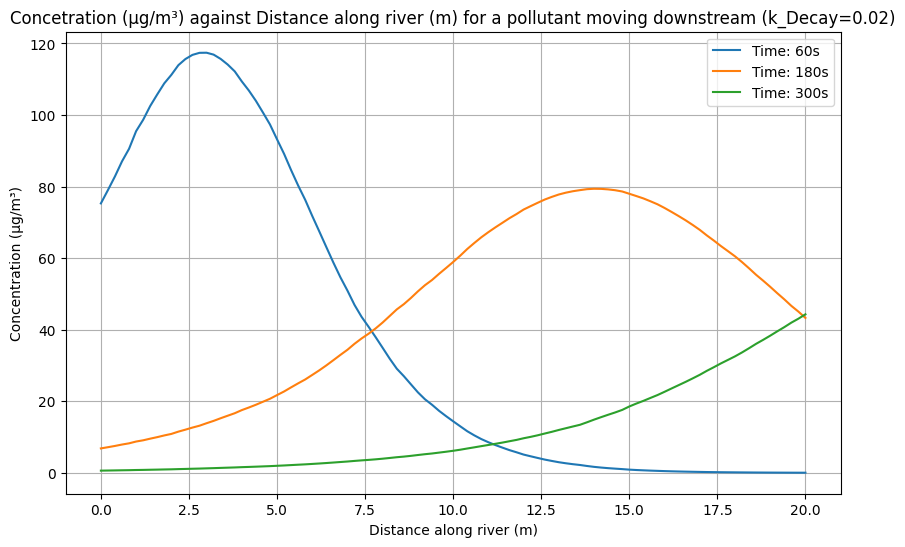

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Allows user to input values for paramters
L=float(input("Enter the value for the domain size for Length (m): ")) #Length of river
T=float(input("Enter the value for the domain size of time (s): ")) #The duration of the simulation
U=float(input("Enter the value for velocity (m/s): ")) #Average flow velocity

#Initialising variables to 0
Nx=0 #Total number of points
dx=0 #Distance between each point
Nt=0 #Total number of time steps
dt=0 #Duration of each time step

#Allows user to choose between number of points or step size
print("Case a: You can enter the values for Nx and Nt")
print("Case b: You can enter the values for dx and dt")
Case=input("Enter a for Case a or b for Case b: ")

if Case=="a":
#User defines total number of points
    Nx=int(input("Enter the value for Nx: "))
    Nt=int(input("Enter the value for Nt: "))
    dx=L/(Nx-1)
    dt=T/(Nt-1)
else:
#User defines step size
    dx=float(input("Enter dx: "))
    dt=float(input("Enter dt: "))
    Nx=int(round(L/dx))+1
    Nt=int(round(T/dt))+1

#Creates arrays that represents space (x) and time (t)
x=np.linspace(0, L, Nx)
t=np.linspace(0, T, Nt)

#Initialising the concentration of the pollutant
Theta_old=np.zeros(Nx) #Concentration at previous time step
Theta_new=np.zeros(Nx) #Concentration a current time step
Beginning=np.zeros((Nt, Nx)) #Stores results for all time steps

#Arrays that build up linear system of equations
A=np.zeros(Nx-1)
B=np.zeros(Nx-1)
F=np.zeros(Nx-1)

#Setting up velocity
np.random.seed(1)
u=U*(1+0.1*np.random.randn(Nx)) #Creates velocity array that varies around the base velocity

#Calculating coeffcients
for i in range(Nx-1):
    A[i]=(1.0/dt)+(u[i+1]/dx) #Calculates current coefficient
    B[i]=-(u[i+1]/dx) #Calculates coeffcient for next node

#Decay constant for the pollutant
k_Decay=0.02 #0.02 so that it can reach the end

for n in range(1, Nt): #Loops through time steps from the inital condition
    Theta_new[0]=250*np.exp(-k_Decay*t[n]) #Concentration starts at 250 and exponentially decays over time
    F[:]=(1/dt)*Theta_old[1:] #Calculates RHS of equation using values from previous time step

#Solving PDE
    for I in range(1, Nx): #Loops through time steps from the inital condition
        Theta_new[I]=(1.0/A[I-1])*(F[I-1]-B[I-1]*Theta_new[I-1]) #Calculates concentration for current point in the river

    Beginning[n, :] = Theta_new[:] #Stores results for current time step
    Theta_old[:] = Theta_new[:] #New values become the old value for allowing iteration to take place
print("Final concentration at end of river:", Theta_new[-1]) #Prints final answer for the concentration of thr river

#Plotting graph
plt.figure(figsize=(10, 6))
indices=[int(Nt*0.2), int(Nt*0.6), Nt-1] #Plots points at 20, 60 and 100% through the simulation
labels=["1 Minute", "3 Minutes", "5 Minutes"]
colors=["green", "orange", "blue"]

time=[60, 180, 300] #Times we want to see

for target_time in time:
    row_index = int(target_time/dt)
    concentration_data = Beginning[row_index, :]
    plt.plot(x, concentration_data, label="Time: "+str(target_time)+"s") #Plots concentration against distance for this specific time

plt.title(f"Concetration (μg/m³) against Distance along river (m) for a pollutant moving downstream (k_Decay={k_Decay})")
plt.xlabel("Distance along river (m)")
plt.ylabel("Concentration (μg/m³)")
plt.legend()
plt.grid(True)
plt.show()